## 오차 등 확실하게 우리가 알고 싶은 것을 얻으려면 어떻게 해야되는지를 파악하기!

In [4]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

## Numpy.linalg.lstsq(a, b, rcond = 'warn')

방정식 $a @ x = b$를 근사적으로 푸는 벡터 x를 계산합니다. 방정식은 과소, 양호 또는 과잉 결정될 수 있다(즉, a의 선형 독립 행의 수가 선형 독립 열의 수보다 적거나 같거나 클 수 있다). a가 제곱이고 전체 순위이면 x(반올림 오차의 경우)가 방정식의 "정확한" 해입니다. 그렇지 않으면, x는 유클리드  $L_{2}$을 최소화한다. 만약 여러 최소화 솔루션이 있다면, 가장 작은  $L_{2}$을 가진 솔루션이 있다 반환됩니다.

Norm에 대해서 간단히 설명하자면, $L_{1}$은 벡터의 크기로, 벡터의 모든 성분의 절대값을 더한 것을 의미하고, $L_{2}$ norm은 출발점에서 도착점까지의 거리를 직선 거리로 측정한 것이다. 

### Parameters

a: (M, N) 계수 행렬이다. Coeffcient matrix.

b: {(M,), (M, K)} 순서 또는 "종속 변수" 값입니다. b가 2차원이면 b의 K 열 각각에 대해 최소 제곱해가 계산됩니다.

rcond: float, optional a의 작은 단수 값에 대한 컷오프 비율. 순위 결정을 위해, 단수 값이 a의 가장 큰 단수 값에 r초보다 작으면 0으로 처리됩니다.


### Returns
X = {(N), (N, k)} 최소 제곱 솔루션 :  b가 2차원이면 해는 x의 K 열에 있다.

residuals = {(1,), (K,), (0,)} 잔차 제곱합: b - a @ x의 각 열에 대한 유클리드 2-노름 제곱. a의 순위가 < N 또는 M < = N이면 빈 배열입니다. 만약 b가 1차원이라면, 이것은 (1,) 모양 배열이다. 그렇지 않으면 모양은 (K,)입니다.

rank = int : matrix a 의 Rank이다.

s = (min(M, N),) : A의 단수 값, Singular values

#### Raises
LinAlgErrorr : 계산이 수렴되지 않으면 뜸

몇가시 예

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


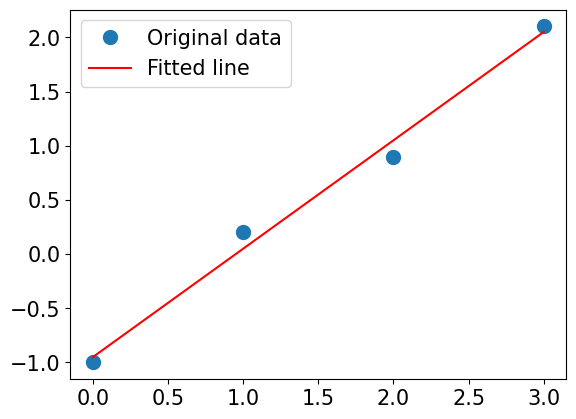

In [26]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

실제 문제에 적용해 보면서 모듈을 익혀보자.

In [13]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

## Numpy.linalg.polyfit(x, y, deg, rcond = 'warn', full = False, w = None, cov = False)

Least squares polynomial fit.-최소 제곱 다항식 적합치입니다.

### Paramters

x: shape(M,) x-coordinates of the M sample points (x[i], y[i]).
y: shape (M,) or (M, K)
deg: Degree of the fitting polynomial
recond: float


In [15]:
A = np.array([
    [3, 1, -2],
    [-7, 3, 0],
    [5, -3, 2]
])
I = np.eye(A.shape[0])

invA = la.solve(A, I)

invA - la.inv(A)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
N = 1000
A = np.random.rand(N, N)
b = np.random.rand(N, 1)

In [25]:
%%timeit
x = la.solve(A, b)

17.8 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
#%%timeit
#x = la.inv(A) @ b

In [28]:
A = [
    [ 3, 0, 1],
    [-3, 7, 2],
    [ 6, 0, 3]
]
w, v = la.eig(A)
v1, v2, v3 = v.T

print(f"""
lambda_1 = {w[0]}, eigvec_1 = {v1}

lambda_2 = {w[1]}, eigvec_2 = {v2}

lambda_3 = {w[2]}, eigvec_3 = {v3}
""")


lambda_1 = 7.0, eigvec_1 = [0. 1. 0.]

lambda_2 = 5.449489742783178, eigvec_2 = [ 0.34299717 -0.42008403  0.84016805]

lambda_3 = 0.5505102572168217, eigvec_3 = [-0.34299717 -0.42008403  0.84016805]

